<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-raw" data-toc-modified-id="Data-raw-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data raw</a></span><ul class="toc-item"><li><span><a href="#data-geoloc" data-toc-modified-id="data-geoloc-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>data geoloc</a></span></li><li><span><a href="#data-ES" data-toc-modified-id="data-ES-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>data ES</a></span></li><li><span><a href="#data-raw" data-toc-modified-id="data-raw-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>data raw</a></span></li></ul></li><li><span><a href="#Data-transform" data-toc-modified-id="Data-transform-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data transform</a></span></li><li><span><a href="#Plot-on-a-map" data-toc-modified-id="Plot-on-a-map-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot on a map</a></span></li></ul></div>

In [55]:
import pandas as pd
import missingno as msno
from pyproj import Transformer
from pyproj import CRS
import numpy as np
import pyproj
import matplotlib.pyplot as plt

## Data raw

In [56]:
header = [
    'section',
    'nofinesset',
    'nofinessej',
    'rs',
    'rslongue',
    'complrs',
    'compldistrib',
    'numvoie',
    'typvoie',
    'voie',
    'compvoie',
    'lieuditbp',
    'commune',
    'departement',
    'libdepartement',
    'ligneacheminement',
    'telephone',
    'telecopie',
    'categetab',
    'libcategetab',
    'categagretab',
    'libcategagretab',
    'siret',
    'codeape',
    'codemft',
    'libmft',
    'codesph',
    'libsph',
    'dateouv',
    'dateautor',
    'maj',
    'numuai'
]

geoloc_names = [
    'nofinesset',
    'coordxet',
    'coordyet',
    'sourcecoordet',
    'datemaj'
]

# file = './finess_geocoded_latest.csv'
# etalab-cs1100507-stock-20210108-0427.csv

In [57]:
df_raw = pd.read_csv(file, encoding ='latin1', sep=";", dtype=str, skiprows=1, header=None, names=header)
#df_raw.drop(columns=['section'], inplace=True)
df_raw.iloc[:6, 8:]

,typvoie,voie,compvoie,lieuditbp,commune,departement,libdepartement,ligneacheminement,telephone,telecopie,...,siret,codeape,codemft,libmft,codesph,libsph,dateouv,dateautor,maj,numuai
0,RTE,DE PARIS,NaN,NaN,451,01,AIN,01440 VIRIAT,0474454647,0474454114,...,26010004500012,8610Z,03,ARS établissements Publics de santé dotation g...,1,Etablissement public de santé,1979-02-13,1979-02-13,2020-02-04,NaN
1,R,GEORGES GIRERD,NaN,BP 139,034,01,AIN,01300 BELLEY,0479425959,0479425996,...,26010003700019,8610Z,03,ARS établissements Publics de santé dotation g...,1,Etablissement public de santé,1901-01-01,1901-01-01,2020-02-04,NaN
2,R,DE L'HOPITAL,NaN,BP 615,427,01,AIN,01606 TREVOUX CEDEX,0474105000,0474105019,...,26010028400017,8610Z,03,ARS établissements Publics de santé dotation g...,1,Etablissement public de santé,1901-01-01,1901-01-01,2018-01-12,NaN
3,R,MARC PANISSOD,NaN,BP 437,173,01,AIN,01174 GEX CEDEX,0450403838,0450403825,...,26010010200011,8610Z,03,ARS établissements Publics de santé dotation g...,1,Etablissement public de santé,1901-01-01,1901-01-01,2020-02-04,NaN
4,AV,DU DOCTEUR BOYER,NaN,NaN,244,01,AIN,01800 MEXIMIEUX,0474610177,0474347184,...,26010013600019,8610Z,03,ARS établissements Publics de santé dotation g...,1,Etablissement public de santé,1945-01-01,1945-01-01,2020-06-30,NaN
5,CHE,DES NIVRES,NaN,BP 55,305,01,AIN,01190 PONT DE VAUX,0385308000,0385308009,...,26010020100052,8610Z,03,ARS établissements Publics de santé dotation g...,1,Etablissement public de santé,1945-01-01,1945-01-01,2020-02-04,NaN


In [58]:
df_raw.loc[df_raw['departement'] == '9G', ['departement' ,'libdepartement']].head(2)

,departement,libdepartement


In [59]:
# Take care 'departement'

df_raw.loc[df_raw['libdepartement'] == 'GUADELOUPE', 'departement'] = '971'
df_raw.loc[df_raw['libdepartement'] == 'MARTINIQUE', 'departement'] = '972'
df_raw.loc[df_raw['libdepartement'] == 'GUYANE', 'departement'] = '973'
df_raw.loc[df_raw['libdepartement'] == 'LA REUNION', 'departement'] = '974'
df_raw.loc[df_raw['libdepartement'] == 'SAINT PIERRE ET MIQUELON', 'departement'] = '975'
df_raw.loc[df_raw['libdepartement'] == 'MAYOTTE', 'departement'] = '976'


In [60]:
#msno.matrix(df_raw)

### data geoloc

In [61]:
#geoloc_raw = df_raw.iloc[int(len(df_raw)/2):]
geoloc_raw = df_raw[df_raw["section"] == "geolocalisation"]
df_geoloc_raw = geoloc_raw.drop(columns=['section'])
geoloc = df_geoloc_raw.drop(columns=geoloc_raw.columns[6:])
geoloc.rename(columns=lambda x: geoloc_names[list(geoloc.columns).index(x)], inplace=True)
geoloc.reset_index(drop = True, inplace = True) 
#geoloc.head(2)

### data ES

In [62]:
df_es_raw = df_raw[df_raw["section"] == "structureet"]
df_es = df_es_raw.drop(columns=['section'])
#df_es.head(2)
#df = df_raw.iloc[:int(len(df_raw)/2)]

### data raw

In [63]:
df_es['nofinesset'] = df_es['nofinesset'].astype(str)
geoloc['nofinesset'] = geoloc['nofinesset'].astype(str)
df_raw = df_es.merge(geoloc, on='nofinesset', how='left')

In [64]:
#df_raw.head()

In [65]:
#df_raw.shape

In [66]:
#msno.matrix(df_raw)

In [67]:
# sauvegarde en utf-8
df_raw.to_csv('RawfinessClean.csv', encoding='utf-8', sep=';')

## Data transform

> Informations sur la Géo-localisation : Le système d’information source contenant les coordonnées géographiques permettant de géo-localiser les établissements
répertoriés dans FINESS est le produit BD-ADRESSE en version 2.1 de l’IGN (Institut Géographique National).

> ZONE SYSTÈME GEODESIQUE ELLIPSOÏDE ASSOCIEE PROJECTION  
//France métropolitaine : RGF93 IAG GRS 1980 Coniques conformes 9 zones - Lambert 93  
//Guadeloupe, Martinique : WGS84 IAG GRS 1980 UTM Nord fuseau 20  
//Guyane : RGFG95 IAG GRS 1980 UTM Nord fuseau 22  
//Réunion : RGR92 IAG GRS 1980 UTM Sud fuseau 40  
//Mayotte : RGM04 IAG GRS 1980 UTM Sud fuseau 38  
//Saint Pierre et Miquelon : RGSPM06 IAG GRS 1980 UTM Nord fuseau 21  

data.gouv.fr

In [68]:
df_final= df_raw.astype(str)

In [69]:
#df_final.loc[:, 'ligneacheminement']


In [70]:
df_steMarie = df_final[df_final['ligneacheminement'].str.contains(r'SAINTE')].head()
df_steMarie.iloc[:, 12:16, ]

,departement,libdepartement,ligneacheminement,telephone
7616,13,BOUCHES DU RHONE,13460 SAINTES MARIES DE LA MER,0490978302
9097,13,BOUCHES DU RHONE,13460 SAINTES MARIES DE LA MER,0490541402
9850,13,BOUCHES DU RHONE,13460 SAINTES MARIES DE LA MER,0491624050
10016,13,BOUCHES DU RHONE,13460 SAINTES MARIES DE LA MER,nan
12549,17,CHARENTE MARITIME,17108 SAINTES CEDEX,0546951515


In [71]:


df_final[['coordxet', 'coordyet']] = df_final[['coordxet', 'coordyet']].apply(pd.to_numeric)
df_final[['Code', 'Ville']] = df_final['ligneacheminement'].str.extract('(\d+)\s([\w+ ]*$)', expand=True)
df_final['Ville'] = df_final['Ville'].str.replace('CEDEX', '')
df_final['Ville'] = df_final['Ville'].str.replace('\d+', '')

In [72]:
#df_final.head(2)

In [73]:
df_cols = [
    'Numero FINESS ET',
    'Numero FINESS EJ',
    'Raison sociale',
    'Raison sociale longue',
    'Complement de raison sociale',
    'Complement de distribution',
    'Numero de voie',
    'Type de voie',
    'Libelle de voie',
    'Complément de voie',
    'Lieu-dit / BP',
    'Code Commune',
    'Departement',
    'Libelle departement',
    'Ligne d’acheminement (CodePostal+Lib commune)',
    'Telephone',
    'Telecopie',
    'Categorie d’etablissement',
    'Libelle categorie d’etablissement',
    'Categorie d’agregat d’etablissement',
    'Libelle categorie d’agregat d’etablissement',
    'Numero de SIRET',
    'Code APE',
    'Code MFT',
    'Libelle MFT',
    'Code SPH',
    'Libelle SPH',
    'Date d’ouverture',
    'Date d’autorisation',
    'Date de mise à jour sur la structure',
    'Numero éducation nationale',
    'CoordX',
    'CoordY',
    'Source des coordonnées',
    'Date de mise à jour des coordonnées',
    'Code Postal',
    'Commune'
]


In [74]:
#df_crs[['Categorie d’etablissement','Libelle categorie d’etablissement' ]].drop_duplicates().head(20)

In [75]:
df_final.columns = df_cols
df_final['CRS']= df_final['Source des coordonnées'].apply(lambda x:x.rsplit(',', 1)[1])

In [76]:
df_steMarie2 = df_final[df_final['Commune'].str.contains(r'SAINTE')].head()
df_steMarie2.iloc[:, 12:]

,Departement,Libelle departement,Ligne d’acheminement (CodePostal+Lib commune),Telephone,Telecopie,Categorie d’etablissement,Libelle categorie d’etablissement,Categorie d’agregat d’etablissement,Libelle categorie d’agregat d’etablissement,Numero de SIRET,...,Date d’autorisation,Date de mise à jour sur la structure,Numero éducation nationale,CoordX,CoordY,Source des coordonnées,Date de mise à jour des coordonnées,Code Postal,Commune,CRS
7616,13,BOUCHES DU RHONE,13460 SAINTES MARIES DE LA MER,0490978302,0490977632,620,Pharmacie d'Officine,3201,Commerce de Biens à Usage Médicaux,35102548100018,...,1951-03-12,2020-05-01,nan,815619.3,6262390.7,"1,ATLASANTE,100,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,13460,SAINTES MARIES DE LA MER,LAMBERT_93
9097,13,BOUCHES DU RHONE,13460 SAINTES MARIES DE LA MER,0490541402,nan,202,Résidences autonomie,4401,Etablissements d'Hébergement pour Personnes Âgées,82795782000026,...,2016-11-14,2019-10-29,nan,816193.1,6262661.8,"2,ATLASANTE,87,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,13460,SAINTES MARIES DE LA MER,LAMBERT_93
9850,13,BOUCHES DU RHONE,13460 SAINTES MARIES DE LA MER,0491624050,nan,460,Service d'Aide et d'Accompagnement à Domicile ...,4605,Etablissements et services multi-clientèles,nan,...,1901-01-01,2018-03-07,nan,815714.5,6262618.2,"3,ATLASANTE,100,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,13460,SAINTES MARIES DE LA MER,LAMBERT_93
10016,13,BOUCHES DU RHONE,13460 SAINTES MARIES DE LA MER,nan,nan,230,Etablissement Consultation Protection Infantile,2202,Etablissements de PMI et de Planification Fami...,22130001501534,...,1901-01-01,1999-03-23,nan,815714.5,6262618.2,"3,ATLASANTE,100,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,13460,SAINTES MARIES DE LA MER,LAMBERT_93
12549,17,CHARENTE MARITIME,17108 SAINTES CEDEX,0546951515,0546951263,355,Centre Hospitalier (C.H.),1102,Centres Hospitaliers,26170002500339,...,1901-01-01,2013-09-04,nan,415649.1,6522865.3,"1,ATLASANTE,100,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,17108,SAINTES,LAMBERT_93


In [77]:
#msno.matrix(df_final)

In [78]:
# sauvegarde en utf-8
df_final.to_csv('finessClean.csv', encoding='utf-8', sep=';')

## Plot France

In [79]:
df_coordinate = df_final.copy()

Use USPG ti find the good projection: https://epsg.org/home.html

In [80]:
EPSG_dict = {"LAMBERT_93":2154, "UTM_N20":4559, "UTM_N21":4467, "UTM_N22":2972, "UTM_S38":4471, "UTM_S40":2975}
df_coordinate["EPSG"] = df_coordinate["CRS"].map(EPSG_dict)

In [81]:
crs = [2154, 4559, 4467, 2972, 4471, 2975]
#https://github.com/pyproj4/pyproj/blob/master/docs/examples.rst
df_crs = pd.DataFrame()
for c in crs:
    df = df_coordinate.loc[df_coordinate["EPSG"] == c, :].copy()
    crs = CRS.from_epsg(c)
    proj = Transformer.from_crs(crs, crs.geodetic_crs, always_xy=True)
    xx, yy = proj.transform(df["CoordX"].values, df["CoordY"].values)
    df["Longitude"] = xx
    df["Latitude"] = yy
    df_crs= df_crs.append(df)

In [82]:
# sauvegarde en utf-8
df_crs.to_csv('finessCrsClean.csv', encoding='utf-8', sep=';')

In [83]:
list_drop = ['Complement de raison sociale', 'Complement de distribution', 'Type de voie','Libelle de voie',
             'Complément de voie','Lieu-dit / BP', 'Ligne d’acheminement (CodePostal+Lib commune)','Telephone',             
             'Telecopie','Source des coordonnées', 'Date de mise à jour des coordonnées', 
             'Numero de voie', 'Libelle de voie', 'Complément de voie']

In [84]:
df_crs_clean = df_crs.drop(list_drop, axis =1 )

In [85]:

df_crs.replace(to_replace='nan', value="Unknow", inplace=True)
df_crs.head(5)

,Numero FINESS ET,Numero FINESS EJ,Raison sociale,Raison sociale longue,Complement de raison sociale,Complement de distribution,Numero de voie,Type de voie,Libelle de voie,Complément de voie,...,CoordX,CoordY,Source des coordonnées,Date de mise à jour des coordonnées,Code Postal,Commune,CRS,EPSG,Longitude,Latitude
0,010000024,010780054,CH DE FLEYRIAT,CENTRE HOSPITALIER DE BOURG-EN-BRESSE FLEYRIAT,Unknow,Unknow,900,RTE,DE PARIS,Unknow,...,870215.7,6571590.5,"1,ATLASANTE,100,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,01440,VIRIAT,LAMBERT_93,2154,5.208596,46.222745
1,010000032,010780062,CH DE BELLEY,CENTRE HOSPITALIER DE BELLEY,Unknow,Unknow,52,R,GEORGES GIRERD,Unknow,...,908659.7,6521503.8,"1,ATLASANTE,100,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,01300,BELLEY,LAMBERT_93,2154,5.684976,45.761208
2,010000065,010780096,CH DE TREVOUX - MONTPENSIER,CENTRE HOSPITALIER DE TREVOUX - MONTPENSIER,Unknow,Unknow,14,R,DE L'HOPITAL,Unknow,...,837272.3,6539470.4,"2,ATLASANTE,100,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,01606,TREVOUX,LAMBERT_93,2154,4.771957,45.941074
3,010000081,010780112,CH DU PAYS DE GEX,CENTRE HOSPITALIER DU PAYS DE GEX,Unknow,Unknow,160,R,MARC PANISSOD,Unknow,...,935201.9,6584824.4,"1,ATLASANTE,100,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,01174,GEX,LAMBERT_93,2154,6.057731,46.322338
4,010000099,010780120,CH DE MEXIMIEUX,CENTRE HOSPITALIER DE MEXIMIEUX,Unknow,Unknow,13,AV,DU DOCTEUR BOYER,Unknow,...,870112.6,6536420.5,"2,ATLASANTE,100,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,01800,MEXIMIEUX,LAMBERT_93,2154,5.194579,45.906192


In [86]:
df_crs_clean.loc[df_crs_clean.eq("nan").any(1), :]

,Numero FINESS ET,Numero FINESS EJ,Raison sociale,Raison sociale longue,Code Commune,Departement,Libelle departement,Categorie d’etablissement,Libelle categorie d’etablissement,Categorie d’agregat d’etablissement,...,Date de mise à jour sur la structure,Numero éducation nationale,CoordX,CoordY,Code Postal,Commune,CRS,EPSG,Longitude,Latitude
0,010000024,010780054,CH DE FLEYRIAT,CENTRE HOSPITALIER DE BOURG-EN-BRESSE FLEYRIAT,451,01,AIN,355,Centre Hospitalier (C.H.),1102,...,2020-02-04,nan,870215.7,6571590.5,01440,VIRIAT,LAMBERT_93,2154,5.208596,46.222745
1,010000032,010780062,CH DE BELLEY,CENTRE HOSPITALIER DE BELLEY,034,01,AIN,355,Centre Hospitalier (C.H.),1102,...,2020-02-04,nan,908659.7,6521503.8,01300,BELLEY,LAMBERT_93,2154,5.684976,45.761208
2,010000065,010780096,CH DE TREVOUX - MONTPENSIER,CENTRE HOSPITALIER DE TREVOUX - MONTPENSIER,427,01,AIN,355,Centre Hospitalier (C.H.),1102,...,2018-01-12,nan,837272.3,6539470.4,01606,TREVOUX,LAMBERT_93,2154,4.771957,45.941074
3,010000081,010780112,CH DU PAYS DE GEX,CENTRE HOSPITALIER DU PAYS DE GEX,173,01,AIN,106,"Centre hospitalier, ex Hôpital local",1106,...,2020-02-04,nan,935201.9,6584824.4,01174,GEX,LAMBERT_93,2154,6.057731,46.322338
4,010000099,010780120,CH DE MEXIMIEUX,CENTRE HOSPITALIER DE MEXIMIEUX,244,01,AIN,106,"Centre hospitalier, ex Hôpital local",1106,...,2020-06-30,nan,870112.6,6536420.5,01800,MEXIMIEUX,LAMBERT_93,2154,5.194579,45.906192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95055,970467031,970411005,EPSMR-UHCD (SITE CHOR),EPSMR-UHCD (SITE CHOR),415,974,LA REUNION,292,Centre Hospitalier Spécialisé lutte Maladies M...,1103,...,2020-03-06,nan,323109.6,7679763.2,97460,ST PAUL,UTM_S40,2975,55.298445,-20.974237
95056,970467098,970430914,IME LEVAVASSEUR,INSTITUT MEDICO-EDUCATIF LEVAVASSEUR,411,974,LA REUNION,183,Institut Médico-Educatif (I.M.E.),4101,...,2020-10-27,9741266H,344376.5,7688256.0,97490,ST DENIS,UTM_S40,2975,55.503723,-20.899445
95057,970467114,970430898,"I.E.M. - IMS ""CHARLES ISAUTIER ""","INSTITUT D'EDUCATION MOTRICE - I. M. S. "" CHAR...",414,974,LA REUNION,192,Institut d'éducation motrice,4103,...,2017-06-15,9741341P,335266.1,7645684.2,97899,ST LOUIS,UTM_S40,2975,55.412071,-21.283167
95058,970467155,970467148,CLINIQUE LES FLAMBOYANTS OUEST,CLINIQUE LES FLAMBOYANTS OUEST,407,974,LA REUNION,161,Maison de Santé pour Maladies Mentales,1111,...,2017-06-20,nan,323715.2,7682873.4,97826,LE PORT,UTM_S40,2975,55.304585,-20.946205


In [87]:
print("nunique code comune", df_crs_clean["Code Commune"].nunique())
print("nb lignes", df_crs_clean.info())

nunique code comune 802
<class 'pandas.core.frame.DataFrame'>
Int64Index: 95140 entries, 0 to 95059
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Numero FINESS ET                             95140 non-null  object 
 1   Numero FINESS EJ                             95140 non-null  object 
 2   Raison sociale                               95140 non-null  object 
 3   Raison sociale longue                        95140 non-null  object 
 4   Code Commune                                 95140 non-null  object 
 5   Departement                                  95140 non-null  object 
 6   Libelle departement                          95140 non-null  object 
 7   Categorie d’etablissement                    95140 non-null  object 
 8   Libelle categorie d’etablissement            95140 non-null  object 
 9   Categorie d’agregat d’etablissement          951

In [88]:
df_steMarie3 = df_crs_clean[df_crs_clean['Commune'].str.contains(r'^STE MARIE$')].head()
df_steMarie3.iloc[:, 4:]

,Code Commune,Departement,Libelle departement,Categorie d’etablissement,Libelle categorie d’etablissement,Categorie d’agregat d’etablissement,Libelle categorie d’agregat d’etablissement,Numero de SIRET,Code APE,Code MFT,...,Date de mise à jour sur la structure,Numero éducation nationale,CoordX,CoordY,Code Postal,Commune,CRS,EPSG,Longitude,Latitude
29062,294,35,ILLE ET VILAINE,405,Service Social Polyvalent de Secteur,5104,Etablissements ou Services Divers d'Aide à la ...,nan,nan,01,...,2003-02-05,nan,325096.1,6744575.3,35600,STE MARIE,LAMBERT_93,2154,-2.001447,47.694673
29446,294,35,ILLE ET VILAINE,620,Pharmacie d'Officine,3201,Commerce de Biens à Usage Médicaux,53965297400020,nan,01,...,2019-08-12,nan,325186.7,6744606.9,35600,STE MARIE,LAMBERT_93,2154,-2.000268,47.695008
29660,294,35,ILLE ET VILAINE,500,Etablissement d'hébergement pour personnes âgé...,4401,Etablissements d'Hébergement pour Personnes Âgées,33159220400050,8710A,41,...,2018-03-19,nan,325176.7,6744491.7,35600,STE MARIE,LAMBERT_93,2154,-2.000304,47.693968
29856,294,35,ILLE ET VILAINE,207,Centre de Jour pour Personnes Agées,4402,Services de Maintien à Domicile pour Personnes...,nan,nan,09,...,2019-02-05,nan,325249.7,6744509.7,35600,STE MARIE,LAMBERT_93,2154,-1.999348,47.694171
93566,228,972,MARTINIQUE,183,Institut Médico-Educatif (I.M.E.),4101,Etab.Educ.Spéciale pour Déficients Mentaux et ...,31398809900039,nan,57,...,2018-02-26,nan,715844.7,1635085.3,97230,STE MARIE,UTM_N20,4559,-60.994666,14.781158


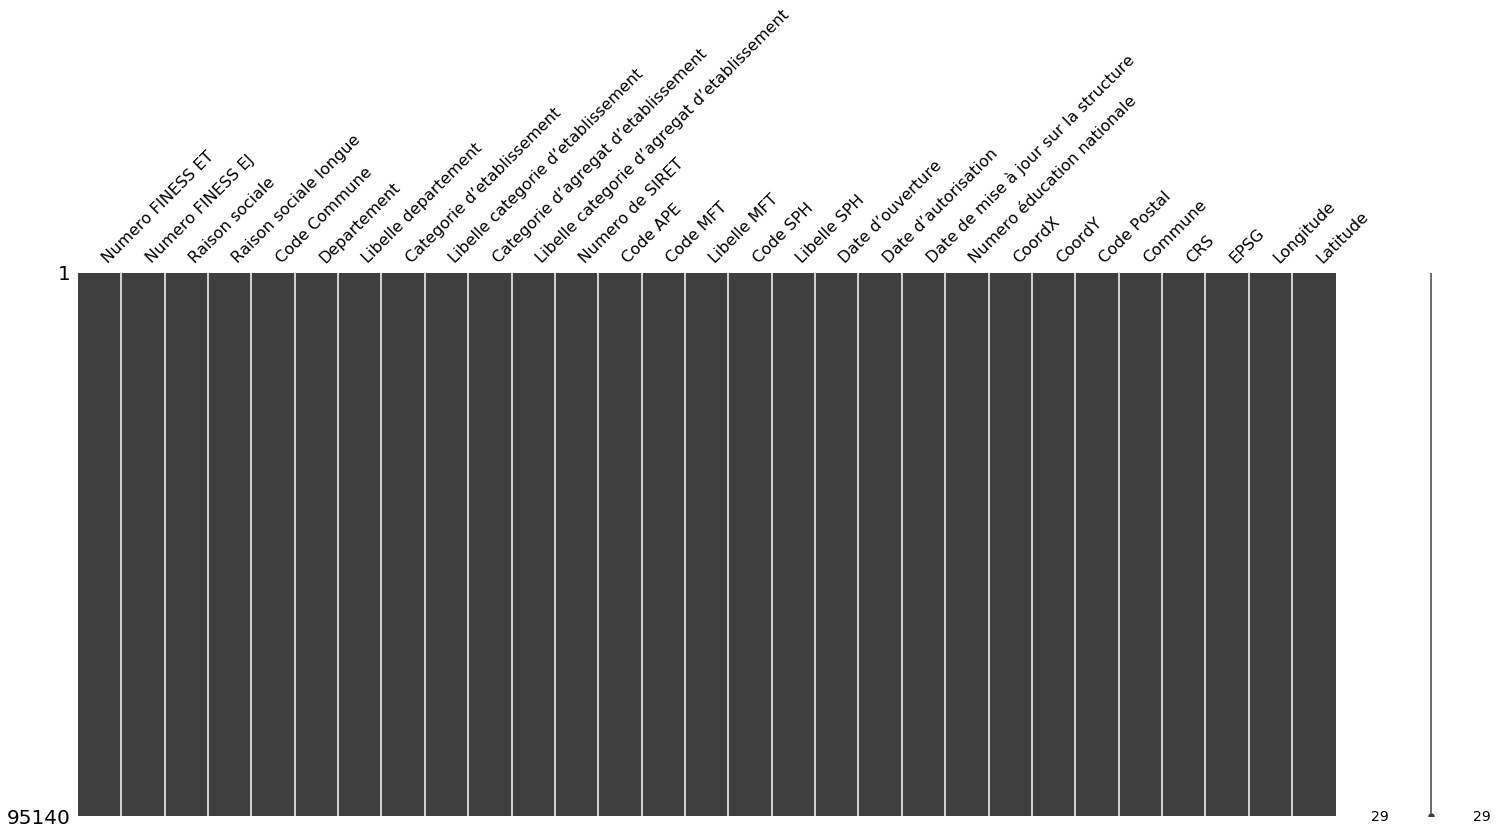

In [89]:
msno.matrix(df_crs_clean)

In [90]:
cols = list(df_crs_clean)
print(len(cols))
cols

29


['Numero FINESS ET',
 'Numero FINESS EJ',
 'Raison sociale',
 'Raison sociale longue',
 'Code Commune',
 'Departement',
 'Libelle departement',
 'Categorie d’etablissement',
 'Libelle categorie d’etablissement',
 'Categorie d’agregat d’etablissement',
 'Libelle categorie d’agregat d’etablissement',
 'Numero de SIRET',
 'Code APE',
 'Code MFT',
 'Libelle MFT',
 'Code SPH',
 'Libelle SPH',
 'Date d’ouverture',
 'Date d’autorisation',
 'Date de mise à jour sur la structure',
 'Numero éducation nationale',
 'CoordX',
 'CoordY',
 'Code Postal',
 'Commune',
 'CRS',
 'EPSG',
 'Longitude',
 'Latitude']

In [91]:
cols_etablissement = cols[:4] + cols[7:21]
print(len(cols_etablissement))
cols_address = cols[4:7] + cols[23:25]
print(len(cols_address))
cols_geo = cols[21:23] + cols[25:]
print(len(cols_geo))
new_cols = cols_etablissement + cols_address[3:] + cols_address[:3] + cols_geo 
df_clean = df_crs_clean[new_cols]
len(df_clean.columns)

18
5
6


29

In [92]:
# sauvegarde en utf-8
df_clean.to_csv('finessCrsCleanSmall_3.csv', encoding='utf-8', sep=';', index=False)
df_clean.iloc[:5, 18:]

,Code Postal,Commune,Code Commune,Departement,Libelle departement,CoordX,CoordY,CRS,EPSG,Longitude,Latitude
0,01440,VIRIAT,451,01,AIN,870215.7,6571590.5,LAMBERT_93,2154,5.208596,46.222745
1,01300,BELLEY,034,01,AIN,908659.7,6521503.8,LAMBERT_93,2154,5.684976,45.761208
2,01606,TREVOUX,427,01,AIN,837272.3,6539470.4,LAMBERT_93,2154,4.771957,45.941074
3,01174,GEX,173,01,AIN,935201.9,6584824.4,LAMBERT_93,2154,6.057731,46.322338
4,01800,MEXIMIEUX,244,01,AIN,870112.6,6536420.5,LAMBERT_93,2154,5.194579,45.906192


In [93]:
df_clean.columns

Index(['Numero FINESS ET', 'Numero FINESS EJ', 'Raison sociale',
       'Raison sociale longue', 'Categorie d’etablissement',
       'Libelle categorie d’etablissement',
       'Categorie d’agregat d’etablissement',
       'Libelle categorie d’agregat d’etablissement', 'Numero de SIRET',
       'Code APE', 'Code MFT', 'Libelle MFT', 'Code SPH', 'Libelle SPH',
       'Date d’ouverture', 'Date d’autorisation',
       'Date de mise à jour sur la structure', 'Numero éducation nationale',
       'Code Postal', 'Commune', 'Code Commune', 'Departement',
       'Libelle departement', 'CoordX', 'CoordY', 'CRS', 'EPSG', 'Longitude',
       'Latitude'],
      dtype='object')

In [94]:
df_clean.dtypes

Numero FINESS ET                                object
Numero FINESS EJ                                object
Raison sociale                                  object
Raison sociale longue                           object
Categorie d’etablissement                       object
Libelle categorie d’etablissement               object
Categorie d’agregat d’etablissement             object
Libelle categorie d’agregat d’etablissement     object
Numero de SIRET                                 object
Code APE                                        object
Code MFT                                        object
Libelle MFT                                     object
Code SPH                                        object
Libelle SPH                                     object
Date d’ouverture                                object
Date d’autorisation                             object
Date de mise à jour sur la structure            object
Numero éducation nationale                      object
Code Posta

In [95]:
df_steMarie3 = df_clean[df_clean['Commune'].str.contains(r'^ALLO')].head()
df_steMarie3.iloc[:, 4:]

,Categorie d’etablissement,Libelle categorie d’etablissement,Categorie d’agregat d’etablissement,Libelle categorie d’agregat d’etablissement,Numero de SIRET,Code APE,Code MFT,Libelle MFT,Code SPH,Libelle SPH,...,Commune,Code Commune,Departement,Libelle departement,CoordX,CoordY,CRS,EPSG,Longitude,Latitude
2158,620,Pharmacie d'Officine,3201,Commerce de Biens à Usage Médicaux,49863232200034,nan,01,Etablissement Tarif Libre,nan,nan,...,ALLOS,006,04,ALPES DE HAUTE PROVENCE,989606.5,6355809.5,LAMBERT_93,2154,6.627408,44.241422
2221,620,Pharmacie d'Officine,3201,Commerce de Biens à Usage Médicaux,00664066800023,nan,01,Etablissement Tarif Libre,nan,nan,...,ALLOS,006,04,ALPES DE HAUTE PROVENCE,985464.0,6359617.5,LAMBERT_93,2154,6.577753,44.277363
40702,500,Etablissement d'hébergement pour personnes âgé...,4401,Etablissements d'Hébergement pour Personnes Âgées,26490660300024,8710A,45,"ARS/PCD, Tarif partiel, habilité aide sociale ...",nan,nan,...,ALLONNES,002,49,MAINE ET LOIRE,475229.5,6692571.3,LAMBERT_93,2154,0.025002,47.295347
40749,460,Service d'Aide et d'Accompagnement à Domicile ...,4605,Etablissements et services multi-clientèles,30176801600109,8810A,08,Président du Conseil Départemental,nan,nan,...,ALLONNES,002,49,MAINE ET LOIRE,475206.9,6692494.4,LAMBERT_93,2154,0.024741,47.294648
41286,620,Pharmacie d'Officine,3201,Commerce de Biens à Usage Médicaux,39213529900015,nan,01,Etablissement Tarif Libre,nan,nan,...,ALLONNES,002,49,MAINE ET LOIRE,474839.6,6692450.2,LAMBERT_93,2154,0.019907,47.294125


## Plot on a map only metropole

In [96]:
# crs = [2154, 4559, 4467, 2972, 4471, 2975]
crs = [2154]
df_crs = pd.DataFrame()
for c in crs:
    df = df_coordinate.loc[df_coordinate["EPSG"] == c, :].copy()
    crs = CRS.from_epsg(c)
    proj = Transformer.from_crs(crs, crs.geodetic_crs, always_xy=True) #longitude, latitude
    xx, yy = proj.transform(df["CoordX"].values, df["CoordY"].values)
    df["Longitude"] = xx
    df["Latitude"] = yy
    df_crs= df_crs.append(df)
#df_crs.head(2)

In [97]:
BBox = (df_crs.Longitude.min(), df_crs.Longitude.max(),df_crs.Latitude.min(), df_crs.Latitude.max())
BBox

(-5.098945276231994, 9.549800851041716, 41.38718764890543, 51.07180250113598)

In [98]:
ruh_m = plt.imread("./map.png")

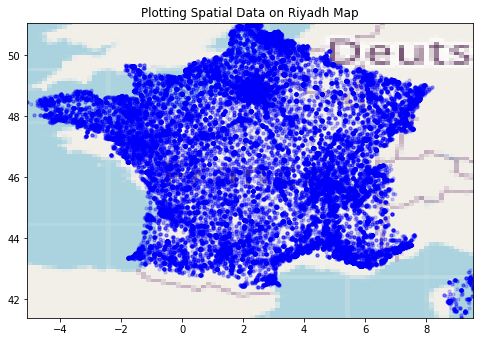

In [99]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_crs.Longitude, df_crs.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

In [100]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline


In [101]:
street_map = gpd.read_file('/home/anthelix/Documents/data/202011_etabSante/Clamart_contours-iris/contours-iris.shp')

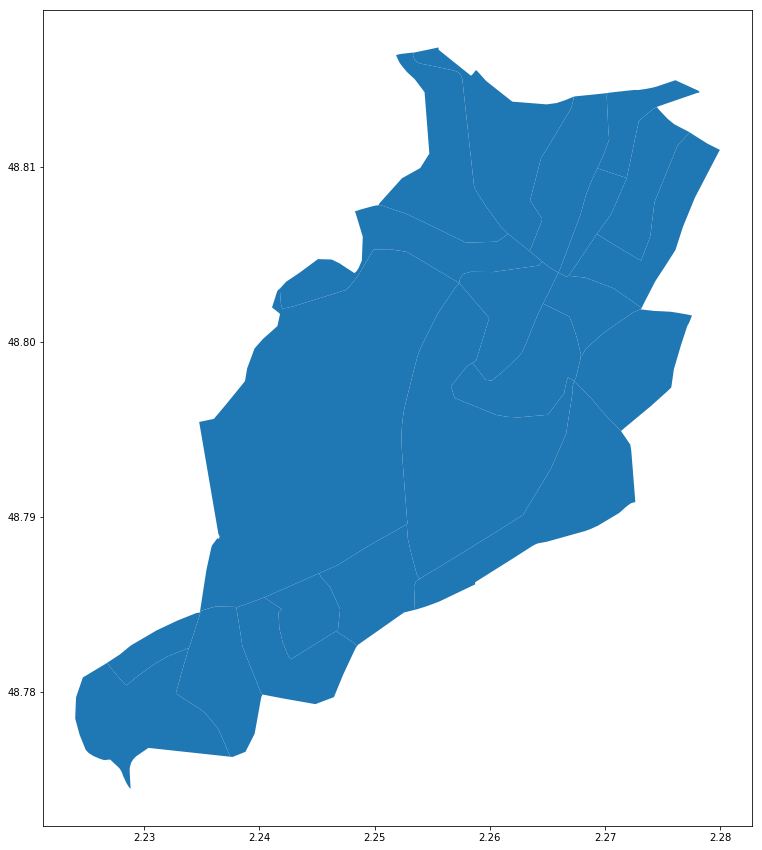

In [102]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)

In [103]:
df_crs_clamart = df_crs.loc[df_crs['Commune'] == 'CLAMART']

In [104]:
crs = 'epsg:4326'
geometry = [Point(xy) for xy in zip(df_crs_clamart["Longitude"], df_crs_clamart["Latitude"])]
geometry[:3]

In [105]:
#df_crs_clamart[df_crs_clamart['Commune'] == 'CLAMART'].head(2)

In [106]:
df_crs_clamart[['Raison sociale', 'Categorie d’etablissement','Libelle categorie d’etablissement' ]].head(20)

,Raison sociale,Categorie d’etablissement,Libelle categorie d’etablissement
86171,CATTP ROOSEVELT,425,Centre d'Accueil Thérapeutique à temps partiel...
86175,CMP DE CLAMART,156,Centre Médico-Psychologique (C.M.P.)
86180,CATTP TRIVAUX,425,Centre d'Accueil Thérapeutique à temps partiel...
86181,HDJ LA PIERRE AUX MOINES CLAMART,292,Centre Hospitalier Spécialisé lutte Maladies M...
86208,SAD CLAMARTOISE AIDE ET SOINS,460,Service d'Aide et d'Accompagnement à Domicile ...
86245,FONDATION D AUTEUIL,177,Maison d'Enfants à Caractère Social
86283,CDS MUNICIPAL AUVERGNE CLAMART,124,Centre de Santé
86292,IME SECTION POLYHANDICAPES MAILLERIE,188,Etablissement pour Enfants ou Adolescents Poly...
86308,IFSI DU CH ANTOINE BÉCLÈRE,300,Ecoles Formant aux Professions Sanitaires
86401,CDS MUNICIPAL JEAN JAURES CLAMART,124,Centre de Santé


In [107]:
geo_df = gpd.GeoDataFrame(df_crs_clamart, # our data
                          crs = crs, # our coordinate reference system
                          geometry = geometry) # the geometry list we created
geo_df.head()

,Numero FINESS ET,Numero FINESS EJ,Raison sociale,Raison sociale longue,Complement de raison sociale,Complement de distribution,Numero de voie,Type de voie,Libelle de voie,Complément de voie,...,CoordY,Source des coordonnées,Date de mise à jour des coordonnées,Code Postal,Commune,CRS,EPSG,Longitude,Latitude,geometry
86171,920000205,940140049,CATTP ROOSEVELT,CENTRE D ACCUEIL THERAPEUTIQUE A TEMPS PARTIEL,nan,nan,33,R,DU PRESID ROOSEVELT,nan,...,6856317.9,"1,ATLASANTE,87,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,92140,CLAMART,LAMBERT_93,2154,2.258377,48.804634,POINT (2.25838 48.80463)
86175,920000270,940140049,CMP DE CLAMART,CMP ADULTES 92G16,nan,nan,60,R,DU PAVE BLANC,nan,...,6854056.4,"1,ATLASANTE,94,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,92140,CLAMART,LAMBERT_93,2154,2.238203,48.784167,POINT (2.23820 48.78417)
86180,920000353,940140049,CATTP TRIVAUX,CENTRE D ACCUEIL THERAPEUTIQUE A TEMPS PARTIEL,nan,nan,142,nan,PORTE DE TRIVAUX,nan,...,6854131.3,"1,ATLASANTE,87,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,92140,CLAMART,LAMBERT_93,2154,2.235518,48.784824,POINT (2.23552 48.78482)
86181,920000379,940140049,HDJ LA PIERRE AUX MOINES CLAMART,HOPITAL DE JOUR LA PIERRE AUX MOINES CLAMART,nan,nan,58,R,DU PAVE BLANC,nan,...,6854046.3,"1,ATLASANTE,94,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,92140,CLAMART,LAMBERT_93,2154,2.238224,48.784077,POINT (2.23822 48.78408)
86208,920003282,920001898,SAD CLAMARTOISE AIDE ET SOINS,SAD CLAMARTOISE AIDE ET SOINS,nan,nan,1,AV,JEAN JAURES,nan,...,6855884.2,"1,ATLASANTE,100,IGN,BD_ADRESSE,V2.2,LAMBERT_93",2020-11-02,92140,CLAMART,LAMBERT_93,2154,2.263508,48.800765,POINT (2.26351 48.80077)


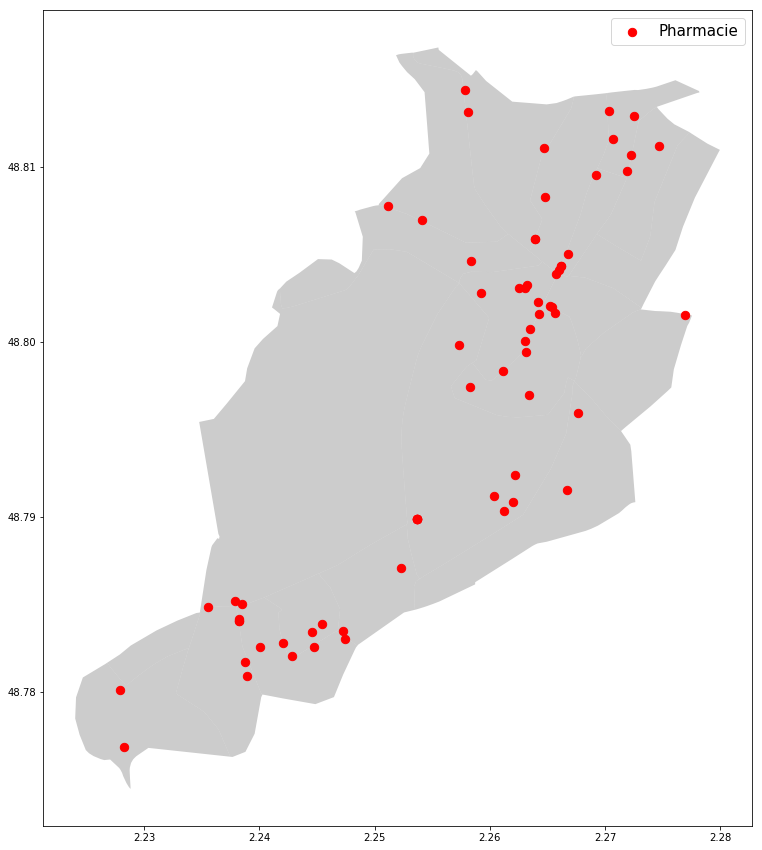

In [108]:
fig, ax = plt.subplots(figsize = (15, 15))
street_map.plot(ax = ax, alpha = 0.4, color='grey')
geo_df.plot(ax = ax, markersize = 70, color = "red", marker = "o", label = "Pharmacie")
plt.legend(prop={'size' : 15})